### Case Study #1: Linear Regression of Height & Weight
##### Group: Group 12
##### Members:  Arun Gharu, Qichun Yu

Import numpy, pandas, matplotlib.pyplot, seaborn and LinearRegression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.linear_model import LinearRegression

Read the height_mass.csv file into a Pandas DataSet called: people

In [3]:
people = pd.read_csv("height_mass.csv")
people

,Height (m),Mass (kg)
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


Use a Seaborn histplot to show the distribution for Mass

<AxesSubplot:xlabel='Mass (kg)', ylabel='Count'>

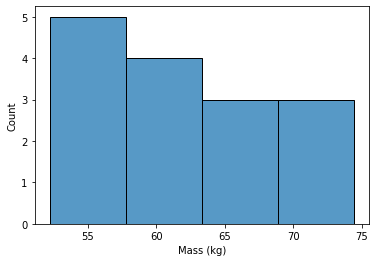

In [22]:
Mass = people['Mass (kg)']
sb.histplot(Mass, bins=4)

What does the plot tell you about the data?<br>
The plot tells us about the overall distribution of mass of 15 people by counting the number of observations that fall within discrete bins. The distribution is not symmetric and it is skewed to the right. 

From our observations, we noted that the seaborn histplot forms the same shape for many different choices of the number of bins but we choose the value of k as 4 because it gives us a typical plot that is able to understand. It has a large number of occurrences in the lower value of Mass. 

Use a Seaborn histplot to show the distribution for Height

<AxesSubplot:xlabel='Height (m)', ylabel='Count'>

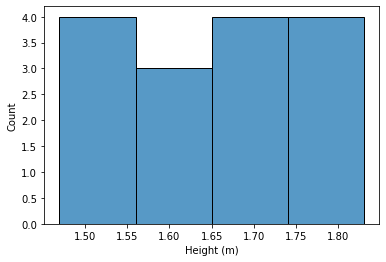

In [28]:
Height = people['Height (m)']
sb.histplot(Height, bins=4)

What does the plot tell you about the data?<br>
The plot tells us about the overall distribution of the height of 15 people by counting the number of observations that fall within discrete bins. 

From our observations, we noted that the seaborn histplot forms the same shape for many different choices of the number of bins but we choose the value of k as 4 because it gives us a typical plot that is able to understand. The graph does not follow a normal distribution and it is a uniform distribution. It provides little information about the system. It has several modes or peaks. 

Use a Seaborn jointplot to plot x=Height, y=Mass

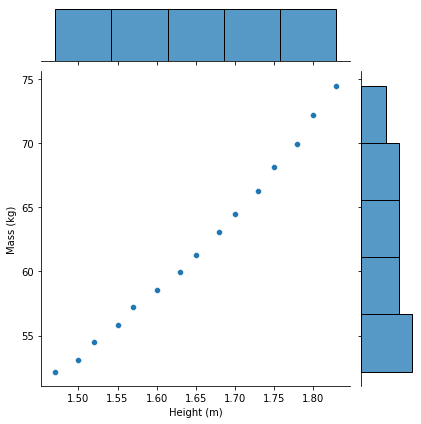

In [5]:
sb.jointplot(x=Height,y=Mass,data=people)

Does this plot confirm what the histplot showed?<br>

Yes, this plot confirms the same result as shown in the histplot. The distribution of height follows a uniform distribution and the distribution of mass is not symmetric. Moreover, from the plot, we can see the relationship that when the height is increasing with the value of mass. The height and the mass seem to have a strong positive correlation with each other. 

Split the data into training and testing data, using appropriate variable names.<br>
- Prepare your x and y:
       x: Drop the Mass column.
       y: Specify the Mass column.
- Use sklearn train_test_split to split the data.

In [6]:
# train, test, split
from sklearn.model_selection import train_test_split

x = people.drop(['Mass (kg)'],axis=1)
y = people['Mass (kg)']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

Create the model and fit it to the training data.
- Create a sklearn LinearRegression model.
- Use the fit method to fit it to the training data.

In [7]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

Predict values based on testing data.

In [8]:
predictions = lm.predict(x_test)

Print out error metrics:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [9]:
# print out some error evaluation metrics
from sklearn import metrics

# MAE: Mean Absolute Error
# MSE: Mean Squared Error
# RMSE: Root Mean Squared Error
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3015034525564431
MSE: 0.16635925324139128
RMSE: 0.4078716136744396


Predict some specific mass. Choose any height directly from the data, predict the
weight for that height, and see whether the prediction is close to reality.

In [10]:
lm.predict([[1.70]])

C:\Users\jacks\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.15639382])

No, the predicted value of height(1.70) does not match the actual value because index 9 of the data clearly shows that the actual value of height(1.70) is matched with mass(64.47). Therefore, the predicted value is a little bit higher which is 65.15. It is a little bit higher and that is why we have a low RMSE error for our model. RootMean Square Error (RMSE) is the standard deviation of the residuals values. It measures how far away the data points are from the regression line. RMSE is a good measure of linear regression because it shows how accurately the model predicts. The lower the RMSE value given the model is able to fit better with the dataset. In our case, RMSE is 0.4079 is low indicating the model has a better fit. 

Use seaborn to display an lmplot with the linear regression line shown (fit_reg=True)

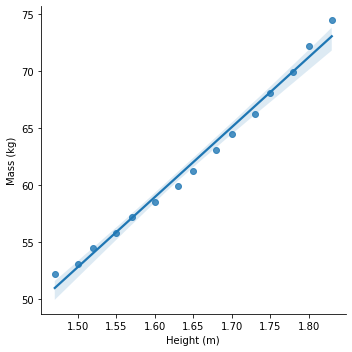

In [11]:
sb.lmplot(x='Height (m)',y='Mass (kg)',data=people, fit_reg=True)

Yes, this plot supports our observations from task #6 as the linear regression line is passing through the joinplot. The plot shows the relationship that the height is increasing with the value of mass. The height and the mass seem to have a strong positive correlation with each other. Noticed that all the data points are very close to the regression line and there is no outlier. 